In [4]:
import numpy as np

import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import GridSearchCV
digits = load_digits()

In [5]:
# Print to show there are 1797 images (8 by 8 images for a dimensionality of 64)
print("Image Data Shape" , digits.data.shape)

# Print to show there are 1797 labels (integers from 0-9)
print("Label Data Shape", digits.target.shape)

Image Data Shape (1797, 64)
Label Data Shape (1797,)


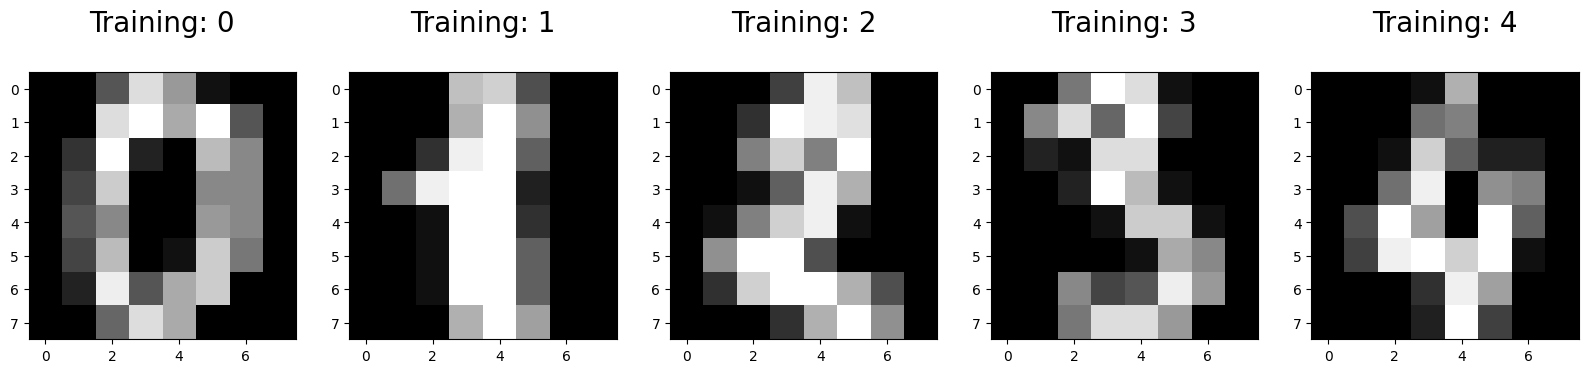

In [6]:
plt.figure(figsize=(20,4))
for index, (image, label) in enumerate(zip(digits.data[0:5], digits.target[0:5])):
    plt.subplot(1, 5, index + 1)
    plt.imshow(np.reshape(image, (8,8)), cmap=plt.cm.gray)
    plt.title('Training: %i\n' % label, fontsize = 20)

**Split the Data into Training and Test Set**

The train set is used to train the model, while the test set is used to evaluate its perfomance on unseen data.

In [9]:
# Split data into training and test sets
X_train, X_test, Y_train, Y_test = train_test_split(digits.data, digits.target, test_size=0.2, random_state=42)

**Create a classification model using RandomForestClassifier**

In [10]:
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, Y_train)

RandomForestClassifier(random_state=42)

**Pick one parameter**

The parameter picked is n_estimators parameter, which represent the number of trees in the forest. This parameter is crucial because it can significantly impact the model's performance.

In [11]:
# Tune the 'n_estimators' parameter
param_grid = {'n_estimators': [50, 100, 150, 200]}
grid_search = GridSearchCV(clf, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, Y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'n_estimators': [50, 100, 150, 200]},
             scoring='accuracy')

**Choose which value for the parameter to set for testing on the test data**

In [12]:
# Choose the best parameter value
best_n_estimator = grid_search.best_params_['n_estimators']
print(f"Best number of estimator: {best_n_estimator}")

Best number of estimator: 200


After running the grip search, the value chosen is 200 because it is the best value based on cross-validation results.

**Train the model**

In [14]:
# Train the model with best parameter
clf = RandomForestClassifier(n_estimators=best_n_estimator, random_state=42)
clf.fit(X_train, Y_train)

RandomForestClassifier(n_estimators=200, random_state=42)

**Confusion matrix for RandomForest model on the test set**

In [15]:
# Predict on the test set
y_predict = clf.predict(X_test)
conf_mat = confusion_matrix(Y_test, y_predict)
print("Confusion Matrix:\n", conf_mat)

Confusion Matrix:
 [[32  0  0  0  1  0  0  0  0  0]
 [ 0 28  0  0  0  0  0  0  0  0]
 [ 0  0 33  0  0  0  0  0  0  0]
 [ 0  0  0 32  0  1  0  0  1  0]
 [ 0  0  0  0 46  0  0  0  0  0]
 [ 0  0  0  0  0 45  1  0  0  1]
 [ 0  0  0  0  0  1 34  0  0  0]
 [ 0  0  0  0  0  0  0 33  0  1]
 [ 0  2  0  0  0  0  0  0 28  0]
 [ 0  0  0  0  0  1  0  1  0 38]]


**Report which classes the model struggles with the most**

In [18]:
print("Classification Report:\n", classification_report(Y_test, y_predict))

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.97      0.98        33
           1       0.93      1.00      0.97        28
           2       1.00      1.00      1.00        33
           3       1.00      0.94      0.97        34
           4       0.98      1.00      0.99        46
           5       0.94      0.96      0.95        47
           6       0.97      0.97      0.97        35
           7       0.97      0.97      0.97        34
           8       0.97      0.93      0.95        30
           9       0.95      0.95      0.95        40

    accuracy                           0.97       360
   macro avg       0.97      0.97      0.97       360
weighted avg       0.97      0.97      0.97       360



The overall accuracy is 0.97, which is excellent. 
The macro average and weighted average for precision, recall and F1-score are all 0.97, indicating consistent performance across all classes.

**Report the accuracy, precision, recall and f1-score**

In [20]:
# Calculate and print accuracy, precision, recal and f1-score
accuracy = accuracy_score(Y_test, y_predict)
precision = precision_score(Y_test, y_predict, average='macro')
recall = recall_score(Y_test, y_predict, average='macro')
f1 = f1_score(Y_test, y_predict, average='macro')

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1}")

Accuracy: 0.9694444444444444
Precision: 0.9707090785690651
Recall: 0.9693670388851865
F1-Score: 0.9697614677667822


**Accuracy(0.969...):** This means that 96.94% of the total predictions made by the model are correct.

**Precision(0.970...):** This indicate that when the model predict a class, it is correct 97.07% of the time.

**Recall(0.969...):** This shows that the model correctly identifies 96.94% of all actual instances of each class.

**F1-score(0.969...):** This is the harmonic mean of precision and recall, providing a single metric that balances both.